In [1]:
# importando bibliotecas
import pandas as pd #Manipulação do dataframe
from adr import dataset, metrics # Importando dataset e metricas
import numpy as np # Biblioteca de calculo cientifico
import matplotlib.pyplot as plt # Biblioteca de visualização
from sklearn import tree # Biblioteca do modelo de árvore de decisão
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold # Biblioteca de separação em treino e teste e validação cruzada
from sklearn.metrics import confusion_matrix # Biblioteca que gera matriz de confusão
from sklearn.utils.multiclass import unique_labels # Biblioteca geradora das labels
import sklearn.metrics
from pprint import pprint

%matplotlib inline

In [2]:
# Criando dataframe
df = dataset.autism()

In [3]:
#Informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               704 non-null    int64 
 1   A1_Score         704 non-null    int64 
 2   A2_Score         704 non-null    int64 
 3   A3_Score         704 non-null    int64 
 4   A4_Score         704 non-null    int64 
 5   A5_Score         704 non-null    int64 
 6   A6_Score         704 non-null    int64 
 7   A7_Score         704 non-null    int64 
 8   A8_Score         704 non-null    int64 
 9   A9_Score         704 non-null    int64 
 10  A10_Score        704 non-null    int64 
 11  age              704 non-null    object
 12  gender           704 non-null    object
 13  ethnicity        704 non-null    object
 14  jundice          704 non-null    object
 15  austim           704 non-null    object
 16  contry_of_res    704 non-null    object
 17  used_app_before  704 non-null    ob

In [4]:
#df.set_index('id', inplace=True)
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [5]:
# Formato do dataset
df.shape

(704, 22)

In [6]:
# Estatísticas gerais do dataset
df.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [7]:
# Colunas do dataset
df.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [11]:
# Calcular o percentual de crianças que possuem sintomas de autismo
yes_autism= df[df['Class/ASD']=='Yes']
no_autism= df[df['Class/ASD']=='No']

print("Crianças com autismo:",round(len(yes_autism)/len(df) * 100,2))

print("Crianças sem autismo:",round(len(no_autism)/len(df) * 100,2))

Crianças com autismo: 0.0
Crianças sem autismo: 0.0


In [13]:
# Exibindo o conteúdo da coluna alvo
df['Class/ASD'].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

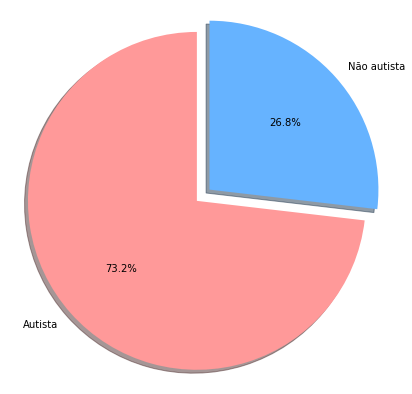

In [15]:
# Gráfico de pizza para a distribuição de valores na coluna alvo.
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ['#ff9999','#66b3ff']
plt.pie(df["Class/ASD"].value_counts(),labels=('Autista','Não autista'),explode = [0.1,0],autopct ='%1.1f%%' ,
        shadow = True,startangle = 90,labeldistance = 1.1, colors = colors)
plt.axis('equal')

plt.show()

In [16]:
# Verificando dados nulos
df.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

<AxesSubplot:>

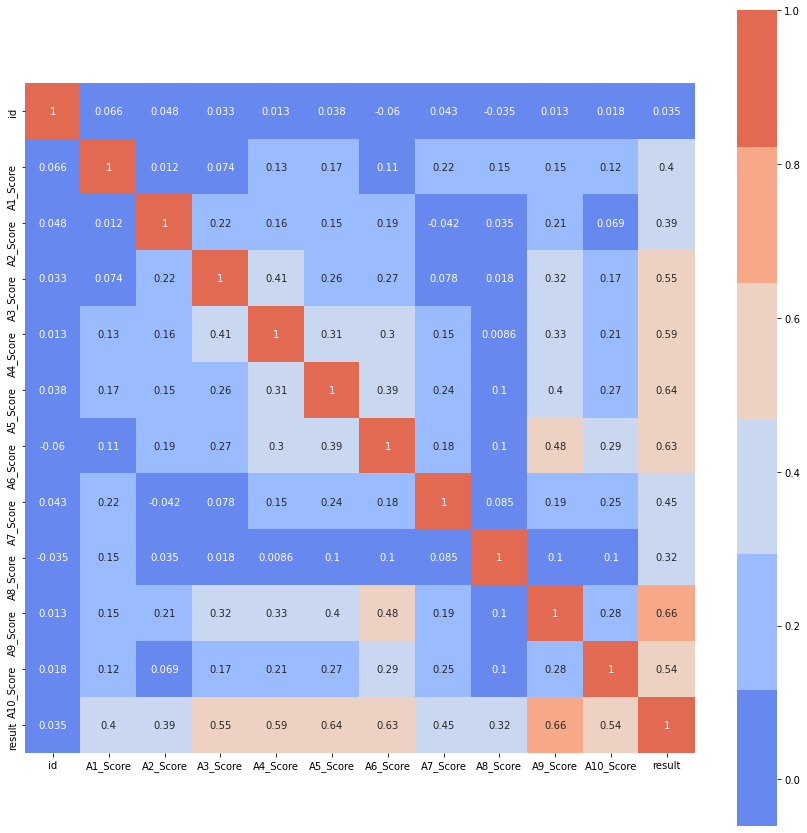

In [17]:
# Correlação por meio da plotagem do mapa de calor do método Pearson
import seaborn as sns
corr = df.corr( )
plt.figure(figsize = (15,15))
colormap = sns.color_palette("coolwarm")
sns.heatmap(data = corr, annot = True, square = True, cbar = True, cmap=colormap)

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'A1_Score'}>,
        <AxesSubplot:title={'center':'A2_Score'}>],
       [<AxesSubplot:title={'center':'A3_Score'}>,
        <AxesSubplot:title={'center':'A4_Score'}>,
        <AxesSubplot:title={'center':'A5_Score'}>],
       [<AxesSubplot:title={'center':'A6_Score'}>,
        <AxesSubplot:title={'center':'A7_Score'}>,
        <AxesSubplot:title={'center':'A8_Score'}>],
       [<AxesSubplot:title={'center':'A9_Score'}>,
        <AxesSubplot:title={'center':'A10_Score'}>,
        <AxesSubplot:title={'center':'result'}>]], dtype=object)

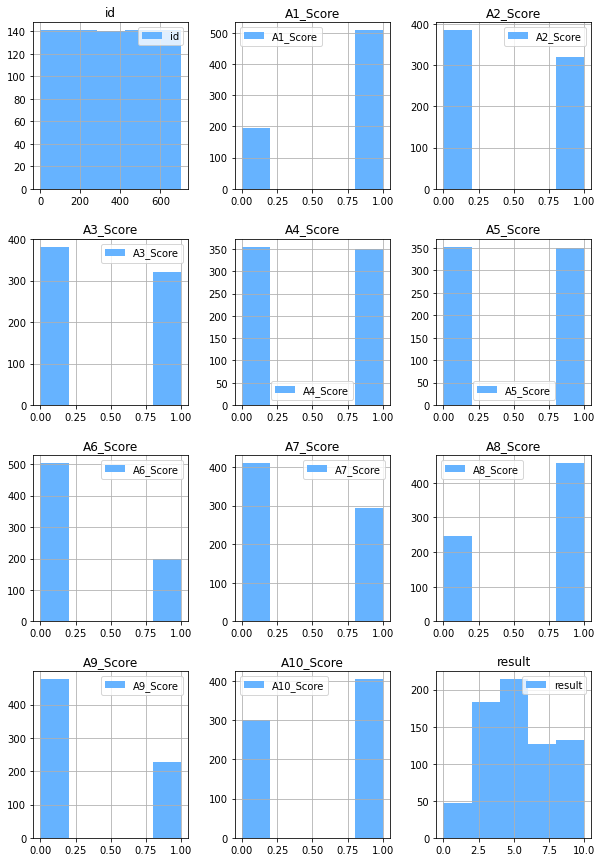

In [18]:
df.hist(grid=True,
        figsize=(10, 15),
        legend=True,
        bins=5,
        orientation='vertical',
        color='#66b3ff')

In [25]:
# Pré-processamento :
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns = ['ethnicity', 'austim', 'Class/ASD', 'gender', 'jundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes

id                  int64
A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender              int64
ethnicity           int64
jundice             int32
austim              int64
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD           int64
dtype: object

In [26]:
df.head(10)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,0,10,0,0,United States,no,6,18 and more,Self,0
1,2,1,1,0,1,0,0,0,1,0,...,1,4,0,1,Brazil,no,5,18 and more,Self,0
2,3,1,1,0,1,1,0,1,1,1,...,1,4,1,1,Spain,no,8,18 and more,Parent,1
3,4,1,1,0,1,0,0,1,1,0,...,0,10,0,1,United States,no,6,18 and more,Self,0
4,5,1,0,0,0,0,0,0,1,0,...,0,0,0,0,Egypt,no,2,18 and more,?,0
5,6,1,1,1,1,1,0,1,1,1,...,1,6,1,0,United States,no,9,18 and more,Self,1
6,7,0,1,0,0,0,0,0,1,0,...,0,2,0,0,United States,no,2,18 and more,Self,0
7,8,1,1,1,1,0,0,0,0,1,...,1,10,0,0,New Zealand,no,5,18 and more,Parent,0
8,9,1,1,0,0,1,0,0,1,1,...,1,10,0,0,United States,no,6,18 and more,Self,0
9,10,1,1,1,1,0,1,1,1,1,...,1,1,1,1,Bahamas,no,8,18 and more,Health care professional,1
